In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
appointment = pd.read_csv('appointments_clean.csv')

In [3]:
# Dimensions
appointment.shape

(110527, 17)

In [4]:
# Check column names
appointment.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'DaysBetween', 'NoShow', 'PreviousMiss'],
      dtype='object')

In [5]:
# Check for missing data
appointment.isnull().sum() / len(appointment) * 100

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
DaysBetween       0.0
NoShow            0.0
PreviousMiss      0.0
dtype: float64

In [6]:
# Preview
appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,NoShow,PreviousMiss
0,39217.84439,5751990,0,2016-05-31,2016-06-03,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,3,0,0
1,43741.75652,5760144,1,2016-06-01,2016-06-01,39,MARIA ORTIZ,0,0,1,0,0,0,No,0,0,0
2,93779.52927,5712759,0,2016-05-18,2016-05-18,33,CENTRO,0,0,0,0,0,0,No,0,0,0
3,141724.16655,5637648,1,2016-04-29,2016-05-02,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,3,0,0
4,537615.28476,5637728,0,2016-04-29,2016-05-06,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,7,0,0


In [7]:
# Check distribution of binary variables
print(appointment.Gender.value_counts(), '\n')
print(appointment.Scholarship.value_counts(), '\n')
print(appointment.Hipertension.value_counts(), '\n')
print(appointment.Diabetes.value_counts(), '\n')
print(appointment.Handcap.value_counts(), '\n')
print(appointment.SMS_received.value_counts(), '\n')
print(appointment.NoShow.value_counts())

0    71840
1    38687
Name: Gender, dtype: int64 

0    99666
1    10861
Name: Scholarship, dtype: int64 

0    88726
1    21801
Name: Hipertension, dtype: int64 

0    102584
1      7943
Name: Diabetes, dtype: int64 

0    108286
1      2241
Name: Handcap, dtype: int64 

0    75045
1    35482
Name: SMS_received, dtype: int64 

0    88208
1    22319
Name: NoShow, dtype: int64


In [20]:
print(pd.crosstab(appointment.Gender, appointment.NoShow) / len(appointment), '\n')
print(pd.crosstab(appointment.Scholarship, appointment.NoShow) / len(appointment), '\n')
print(pd.crosstab(appointment.Hipertension, appointment.NoShow) / len(appointment), '\n')
print(pd.crosstab(appointment.Diabetes, appointment.NoShow) / len(appointment), '\n')
print(pd.crosstab(appointment.Handcap, appointment.NoShow) / len(appointment), '\n')
print(pd.crosstab(appointment.SMS_received, appointment.NoShow) / len(appointment), '\n')

NoShow         0         1
Gender                    
0       0.517937  0.132040
1       0.280131  0.069892 

NoShow              0         1
Scholarship                    
0            0.723126  0.178608
1            0.074941  0.023325 

NoShow               0         1
Hipertension                    
0             0.634949  0.167805
1             0.163119  0.034127 

NoShow           0         1
Diabetes                    
0         0.739141  0.188995
1         0.058927  0.012938 

NoShow          0         1
Handcap                    
0        0.781474  0.198250
1        0.016593  0.003682 

NoShow               0         1
SMS_received                    
0             0.565563  0.113411
1             0.232504  0.088521 



In [46]:
def my_histogram(var, include_kde):
    
    title_dict = {'fontsize': 18}
    axes_dict = {'fontsize': 14}
    
    sns.distplot(appointment[var], kde = include_kde, bins = 25, color = '#5F4787')
    
    plt.title('Distribution of ' + var, fontdict = title_dict)
    plt.xlabel(var, fontdict = axes_dict)
    plt.ylabel('Count', fontdict = axes_dict)
    plt.show()
    
def my_regplot(var, n = 10000):
    
    title_dict = {'fontsize': 18}
    axes_dict = {'fontsize': 14}
    
    sns.regplot(
        x = var, 
        y = 'NoShow', 
        data = appointment.sample(n, random_state = 314),
        logistic = True, 
        y_jitter = 0.03,
        color = '#5F4787',
        scatter_kws = {'alpha': 0.1}
    )
    
    plt.title('No Show by ' + var, fontdict = title_dict)
    plt.xlabel(var, fontdict = axes_dict)
    plt.ylabel('No Show', fontdict = axes_dict)
    plt.show()

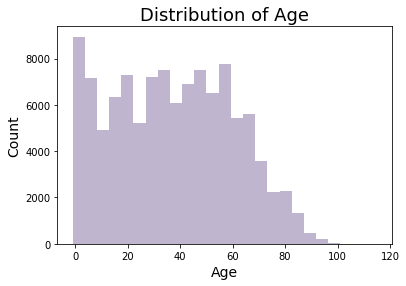

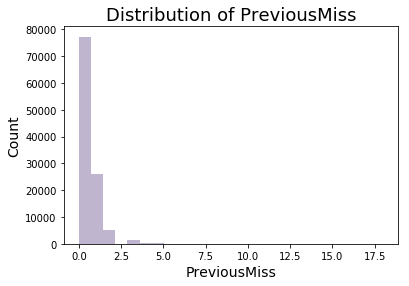

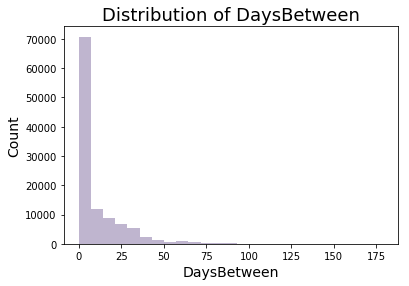

In [11]:
my_histogram('Age', False)
my_histogram('PreviousMiss', False)
my_histogram('DaysBetween', False)

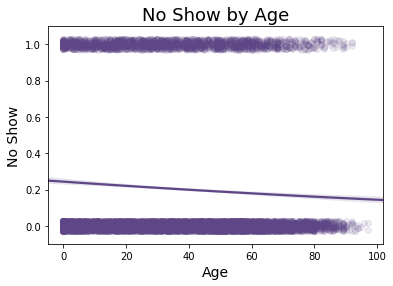

In [47]:
my_regplot('Age')
my_regplot('PreviousMiss')
my_regplot('DaysBetween')